In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

# Loading data

In [3]:
sales_data=pd.read_excel(r"C:\Users\HP\Desktop\sales_data.xlsx")
date_data=pd.read_excel(r"C:\Users\HP\Desktop\date.xlsx")

# EDA

In [4]:
sales_data.head()

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
sales_data.shape

(541909, 8)

In [6]:
date_data.shape

(541909, 6)

In [7]:
data=pd.concat([sales_data,date_data],axis=1)

In [8]:
data.columns

Index(['transaction id', 'product id', 'product description', 'quantity sold',
       'transaction timestamp', 'unit price', 'customer id',
       'transaction country', 'timestamp              ', 'date', 'day_name',
       'day_of_month', 'month_of_year', 'time_of_day(hh:mm:ss)'],
      dtype='object')

In [9]:
data.shape

(541909, 14)

In [10]:
data.head()

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss)
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00


In [11]:
data.dtypes

transaction id                     object
product id                         object
product description                object
quantity sold                       int64
transaction timestamp      datetime64[ns]
unit price                        float64
customer id                       float64
transaction country                object
timestamp                  datetime64[ns]
date                       datetime64[ns]
day_name                           object
day_of_month                        int64
month_of_year                      object
time_of_day(hh:mm:ss)              object
dtype: object

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 14 columns):
transaction id             541909 non-null object
product id                 541909 non-null object
product description        540455 non-null object
quantity sold              541909 non-null int64
transaction timestamp      541909 non-null datetime64[ns]
unit price                 541909 non-null float64
customer id                406829 non-null float64
transaction country        541909 non-null object
timestamp                  541909 non-null datetime64[ns]
date                       541909 non-null datetime64[ns]
day_name                   541909 non-null object
day_of_month               541909 non-null int64
month_of_year              541909 non-null object
time_of_day(hh:mm:ss)      541909 non-null object
dtypes: datetime64[ns](3), float64(2), int64(2), object(7)
memory usage: 57.9+ MB


Our dataset is composed of **541909** rows and **14** columns. When going through the columns, we notice that we have some missing values in the **customer id** column, as it only has **406829** values. Also the column **product description** has missing values. So, that should be considered when applying exploration to our dataset.

In [13]:
#exploring the unique values of each attribute
print("Number of transactions: ", data['transaction id'].nunique())
print("Number of products: ",data['product id'].nunique())
print("Number of customers:", data['customer id'].nunique() )
print("Percentage of customers NA: ", round(data['customer id'].isnull().sum() * 100 / len(data),2),"%" )
print('Number of countries: ',data['transaction country'].nunique())

Number of transactions:  25900
Number of products:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38


In [14]:
data.drop(columns='transaction timestamp',inplace=True)

In [15]:
data.shape

(541909, 13)

In [16]:
data['sales_amount']=data['quantity sold']*data['unit price']

In [17]:
data['customer id'].nunique()

4372

In [18]:
1589/4372

0.3634492223238792

There are negative values in quantity and unit price which are of cancelled orders.

### Cancelled Orders

In [19]:
cancelled_orders=data[data['quantity sold']<0]

In [20]:
cancelled_orders.head()

,transaction id,product id,product description,quantity sold,unit price,customer id,transaction country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss),sales_amount
141,C536379,D,Discount,-1,27.50,14527.0,United Kingdom,2010-12-01 09:41:00,2010-12-01,Wednesday,1,December,09:41:00,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.0,United Kingdom,2010-12-01 09:49:00,2010-12-01,Wednesday,1,December,09:49:00,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0,United Kingdom,2010-12-01 10:24:00,2010-12-01,Wednesday,1,December,10:24:00,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12-01 10:24:00,2010-12-01,Wednesday,1,December,10:24:00,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12-01 10:24:00,2010-12-01,Wednesday,1,December,10:24:00,-6.96


**How much cancelled orders do we have?** 

In [21]:
#check how many rows our dataframe of cancelled orders contain
print("We have ",len(cancelled_orders), " cancelled orders.")
#percentage of cancelled orders in total orders
total_orders = data['transaction id'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

We have  10624  cancelled orders.
Percentage of orders canceled: 10624/25900 (41.02%) 


#### What's the average number of orders cancelled per customer?

In [22]:
# get unique transaction id per customer
groupby_customers = pd.DataFrame(cancelled_orders.groupby('customer id')['transaction id'].nunique())
groupby_customers.sort_values(by='transaction id',ascending=False).head(10)

,transaction id
customer id,
14911.0,47
17841.0,45
14606.0,35
14527.0,31
15311.0,27
16422.0,24
13089.0,21
12471.0,19
13408.0,19


In [23]:
groupby_customers.describe()

,transaction id
count,1589.000000
mean,2.299559
std,3.034583
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,47.000000


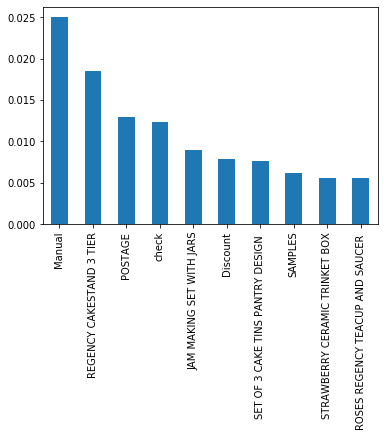

In [24]:
cancelled_orders['product description'].value_counts(1)[:10].plot(kind='bar')

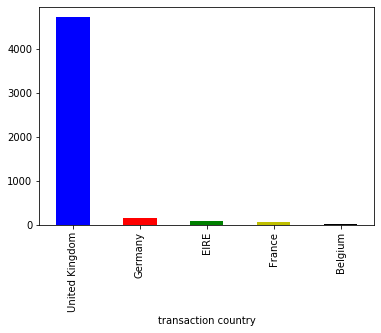

In [25]:
cancelled_orders.groupby('transaction country')['transaction id'].nunique().sort_values(ascending=False)[:5].plot(kind='bar',color=['b', 'r', 'g', 'y', 'k'])

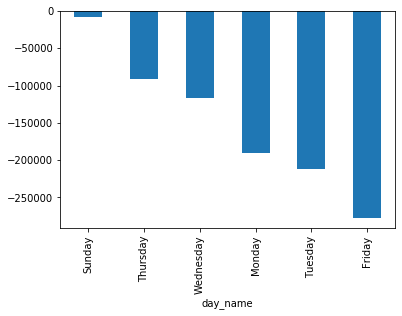

In [26]:
cancelled_orders.groupby('day_name')['sales_amount'].sum().sort_values(ascending=False).plot.bar()

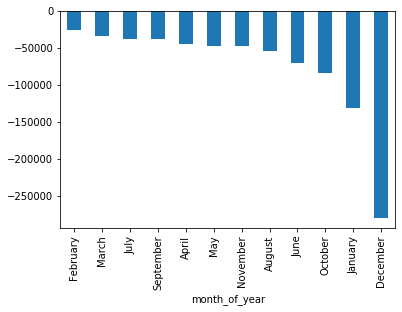

In [27]:
cancelled_orders.groupby('month_of_year')['sales_amount'].sum().sort_values(ascending=False).plot.bar()

### Sold Orders

In [28]:
sold_data=data[data['quantity sold']>0]

In [29]:
sold_data.describe()

,quantity sold,unit price,customer id,day_of_month,sales_amount
count,531285.000000,531285.000000,397924.000000,531285.000000,531285.00000
mean,10.655262,3.857296,15294.315171,15.024695,20.03550
std,156.830323,41.810047,1713.169877,8.662157,270.91237
min,1.000000,-11062.060000,12346.000000,1.000000,-11062.06000
25%,1.000000,1.250000,13969.000000,7.000000,3.75000
50%,3.000000,2.080000,15159.000000,15.000000,9.90000
75%,10.000000,4.130000,16795.000000,22.000000,17.70000
max,80995.000000,13541.330000,18287.000000,31.000000,168469.60000


In [30]:
# get unique transaction id number per customer
products_sold=pd.DataFrame(sold_data.groupby('customer id')['transaction id'].nunique())


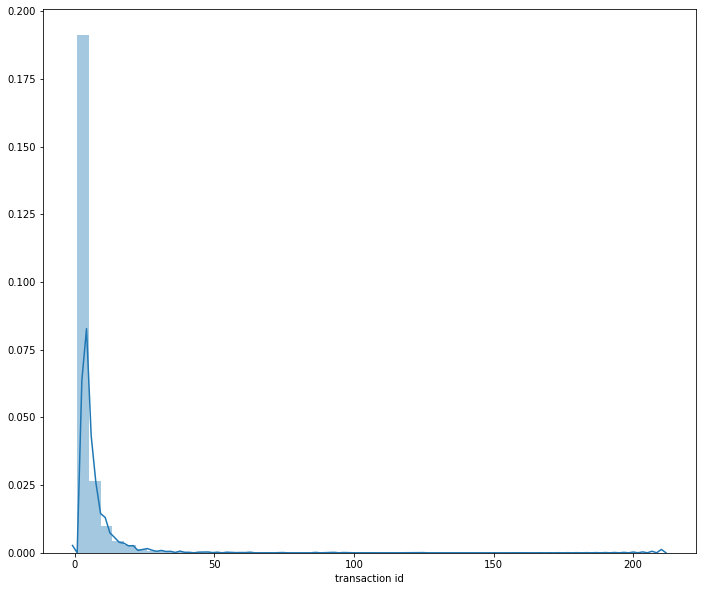

In [31]:
#Visualize the variable productsNumber distribution
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 10)
sn.distplot(products_sold['transaction id'],ax=ax)
plt.show()

#### Countries with highest Revenue

In [36]:
sold_data.groupby('transaction country').sales_amount.mean().sort_values(ascending=False)[:10]

transaction country
Netherlands    120.798282
Australia      116.895620
Japan          116.561900
Singapore       95.852658
Sweden          85.096075
Hong Kong       55.252817
Denmark         49.882474
Lithuania       47.458857
Bahrain         41.896667
Lebanon         37.641778
Name: sales_amount, dtype: float64

In [37]:
data[['sales_amount','quantity sold','unit price']].head()

,sales_amount,quantity sold,unit price
0,15.30,6,2.55
1,20.34,6,3.39
2,22.00,8,2.75
3,20.34,6,3.39
4,20.34,6,3.39


In [38]:
data.isna().sum()/len(data)

transaction id             0.000000
product id                 0.000000
product description        0.002683
quantity sold              0.000000
unit price                 0.000000
customer id                0.249267
transaction country        0.000000
timestamp                  0.000000
date                       0.000000
day_name                   0.000000
day_of_month               0.000000
month_of_year              0.000000
time_of_day(hh:mm:ss)      0.000000
sales_amount               0.000000
dtype: float64

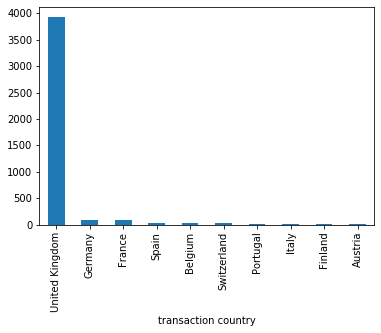

In [39]:
sold_data.groupby('transaction country')['customer id'].nunique().sort_values(ascending=False)[:10].plot.bar()

### Total Revenue per country

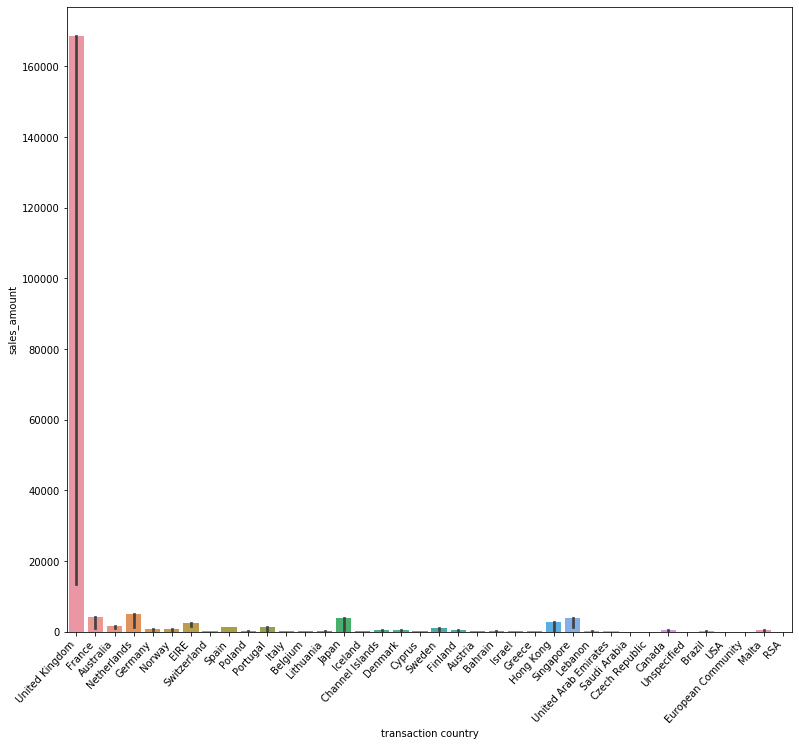

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='transaction country', y='sales_amount',data=sold_data,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

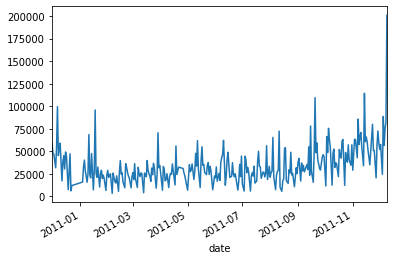

In [46]:
sold_data.groupby('date')['sales_amount'].sum().plot()

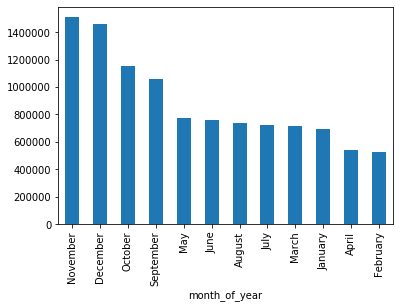

In [47]:
sold_data.groupby('month_of_year')['sales_amount'].sum().sort_values(ascending=False).plot.bar()

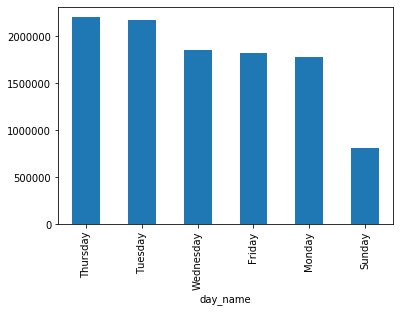

In [48]:
sold_data.groupby('day_name')['sales_amount'].sum().sort_values(ascending=False).plot.bar()

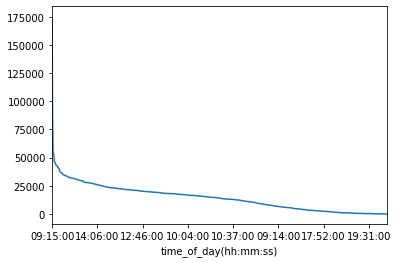

In [49]:
sold_data.groupby('time_of_day(hh:mm:ss)')['sales_amount'].sum().sort_values(ascending=False).plot()

We have better sales in the morning than in the evenings.

In [57]:
sold_data.groupby('customer id')['sales_amount'].sum().sort_values(ascending=False)

customer id
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
16684.0     66653.56
14096.0     65164.79
13694.0     65039.62
15311.0     60767.90
13089.0     58825.83
17949.0     58510.48
15769.0     56252.72
15061.0     54534.14
14298.0     51527.30
14088.0     50491.81
15749.0     44534.30
12931.0     42055.96
17841.0     40991.57
15098.0     39916.50
13798.0     37153.85
16013.0     37130.60
16422.0     34684.40
12748.0     33719.73
15838.0     33643.08
17404.0     31906.82
             ...    
14589.0        39.75
12977.0        39.24
16659.0        39.12
18019.0        38.45
12855.0        38.10
16162.0        37.40
17816.0        36.56
15940.0        35.80
17831.0        35.40
16856.0        35.40
14576.0        35.40
15744.0        34.80
16765.0        34.00
17408.0        32.65
13120.0        30.60
15657.0        30.00
1

In [54]:
sold_data.groupby('customer id')['transaction id'].nunique().sort_values(ascending=False).describe()

count    4339.000000
mean        4.271952
std         7.705493
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       210.000000
Name: transaction id, dtype: float64

##### The average number of orders per customer  is 4.

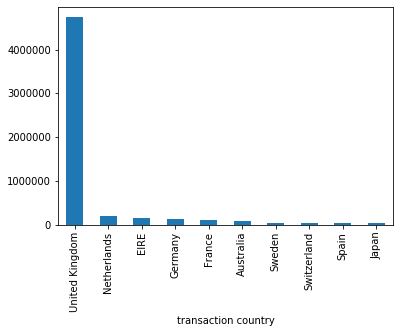

In [55]:
sold_data.groupby('transaction country')['quantity sold'].sum().sort_values(ascending=False)[:10].plot.bar()

As we can see, the largest market is the one located in UK.

In [60]:
sold_data[sold_data['transaction country']=='United Kingdom']['customer id'].nunique()

3921

So, we can conclude not only most sales revenues are achieved in the UK, but also most customers are located there too. We can explore this to find more about what products the customers buy together and what possible future opportunities in the UK Market. 

In [61]:
retail_uk = sold_data[sold_data['transaction country']=='United Kingdom']
retail_uk.describe()

,quantity sold,unit price,customer id,day_of_month,sales_amount
count,486286.000000,486286.000000,354345.000000,486286.000000,486286.000000
mean,9.734640,3.794976,15552.436219,15.009061,18.513998
std,163.262428,41.271159,1594.546025,8.687810,281.842405
min,1.000000,-11062.060000,12346.000000,1.000000,-11062.060000
25%,1.000000,1.250000,14194.000000,7.000000,3.360000
50%,3.000000,2.100000,15522.000000,15.000000,8.400000
75%,10.000000,4.130000,16931.000000,22.000000,16.950000
max,80995.000000,13541.330000,18287.000000,31.000000,168469.600000


## Explore quantity

**What are the products that are most bought in UK?**

In [63]:
groupedProduct = retail_uk.groupby('product id',as_index= False)['quantity sold'].sum().sort_values(by='quantity sold', ascending=False)
groupedProduct.head(10)

,product id,quantity sold
2394,23843,80995
1948,23166,77036
1036,22197,53343
2568,84077,49526
3541,85099B,44268
3552,85123A,39513
2673,84879,33735
1419,22616,25331
366,21212,24986
1017,22178,23692
